In [1691]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [1210]:
train = pd.read_csv("all/train.csv")
test = pd.read_csv("all/test.csv")

In [1211]:
train_id = train['Id']

In [1212]:
test_id = test['Id']

In [1213]:
train.drop('Id',axis = 1, inplace = True)
test.drop('Id',axis = 1, inplace = True)

In [1214]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1215]:
y_train = train['SalePrice']

In [1216]:
train = train.drop(['SalePrice'], axis=1)

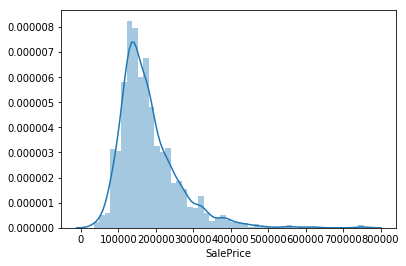

In [1217]:
sns.distplot(y_train)

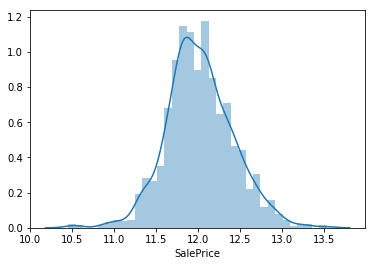

In [1218]:
sns.distplot(np.log1p(y_train))

In [1219]:
logy_train = np.log1p(y_train)

In [1220]:
train.shape

(1460, 79)

In [1221]:
test.shape

(1459, 79)

In [1222]:
train.columns == test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [1223]:
from sklearn.model_selection import train_test_split
train, mytest, y_train, y_mytest = train_test_split(
     train, logy_train, test_size=0.2, random_state=42)

In [1224]:
train.shape, y_train.shape, logy_train.shape

((1168, 79), (1168,), (1460,))

In [1225]:
mytest.shape, y_mytest.shape

((292, 79), (292,))

In [1226]:
missing_df = train.isnull().sum().reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by = 'missing_count')
missing_df['missing_percentage'] = missing_df['missing_count']/train.shape[0]

In [1227]:
missing_df

,column_name,missing_count,missing_percentage
41,Electrical,1,0.000856
24,MasVnrType,6,0.005137
25,MasVnrArea,6,0.005137
29,BsmtQual,28,0.023973
30,BsmtCond,28,0.023973
31,BsmtExposure,28,0.023973
32,BsmtFinType1,28,0.023973
34,BsmtFinType2,28,0.023973
63,GarageCond,64,0.054795
62,GarageQual,64,0.054795


### Dealing with the missing value according to information in data_description.txt

In [1228]:
index = train['PoolQC'].isnull()
train.loc[index,'PoolQC'] = "None"

index = mytest['PoolQC'].isnull()
mytest.loc[index,'PoolQC'] = "None"

index = test['PoolQC'].isnull()
test.loc[index,'PoolQC'] = "None"

In [1229]:
index = train['MiscFeature'].isnull()
train.loc[index,'MiscFeature'] = "None"

index = mytest['MiscFeature'].isnull()
mytest.loc[index,'MiscFeature'] = "None"

index = test['MiscFeature'].isnull()
test.loc[index,'MiscFeature'] = "None"

In [1230]:
index = train['Fence'].isnull()
train.loc[index,'Fence'] = "None"

index = mytest['Fence'].isnull()
mytest.loc[index,'Fence'] = "None"

index = test['Fence'].isnull()
test.loc[index,'Fence'] = "None"

In [1231]:
index = train['Alley'].isnull()
train.loc[index,'Alley'] = "None"

index = mytest['Alley'].isnull()
mytest.loc[index,'Alley'] = "None"

index = test['Alley'].isnull()
test.loc[index,'Alley'] = "None"

In [1232]:
index = train['FireplaceQu'].isnull()
train.loc[index,'FireplaceQu'] = "None"

index = mytest['FireplaceQu'].isnull()
mytest.loc[index,'FireplaceQu'] = "None"

index = test['FireplaceQu'].isnull()
test.loc[index,'FireplaceQu'] = "None"

In [1233]:
mean_value = np.mean(train[train['LotFrontage'].notnull()]['LotFrontage'])
train.loc[train['LotFrontage'].isnull(),'LotFrontage'] = mean_value

mytest.loc[mytest['LotFrontage'].isnull(),'LotFrontage'] = mean_value

test.loc[test['LotFrontage'].isnull(),'LotFrontage'] = mean_value

In [1234]:
median_value = np.median(train[train['GarageYrBlt'].notnull()]['GarageYrBlt'])
train.loc[train['GarageYrBlt'].isnull(),'GarageYrBlt'] = median_value

mytest.loc[mytest['GarageYrBlt'].isnull(),'GarageYrBlt'] = median_value

test.loc[test['GarageYrBlt'].isnull(),'GarageYrBlt'] = median_value

In [1235]:
index = train['GarageType'].isnull()
train.loc[index,'GarageType'] = "None"

index = mytest['GarageType'].isnull()
mytest.loc[index,'GarageType'] = "None"

index = test['GarageType'].isnull()
test.loc[index,'GarageType'] = "None"

In [1236]:
index = train['GarageFinish'].isnull()
train.loc[index,'GarageFinish'] = "None"

index = mytest['GarageFinish'].isnull()
mytest.loc[index,'GarageFinish'] = "None"

index = test['GarageFinish'].isnull()
test.loc[index,'GarageFinish'] = "None"

In [1237]:
index = train['GarageQual'].isnull()
train.loc[index,'GarageQual'] = "None"

index = mytest['GarageQual'].isnull()
mytest.loc[index,'GarageQual'] = "None"

index = test['GarageQual'].isnull()
test.loc[index,'GarageQual'] = "None"

In [1238]:
index = train['GarageCond'].isnull()
train.loc[index,'GarageCond'] = "None"

index = mytest['GarageCond'].isnull()
mytest.loc[index,'GarageCond'] = "None"

index = test['GarageCond'].isnull()
test.loc[index,'GarageCond'] = "None"

In [1239]:
index = train['BsmtFinType2'].isnull()
train.loc[index,'BsmtFinType2'] = "None"

index = mytest['BsmtFinType2'].isnull()
mytest.loc[index,'BsmtFinType2'] = "None"

index = test['BsmtFinType2'].isnull()
test.loc[index,'BsmtFinType2'] = "None"

In [1240]:
index = train['BsmtExposure'].isnull()
train.loc[index,'BsmtExposure'] = "None"

index = mytest['BsmtExposure'].isnull()
mytest.loc[index,'BsmtExposure'] = "None"

index = test['BsmtExposure'].isnull()
test.loc[index,'BsmtExposure'] = "None"

In [1241]:
index = train['BsmtFinType1'].isnull()
train.loc[index,'BsmtFinType1'] = "None"

index = mytest['BsmtFinType1'].isnull()
mytest.loc[index,'BsmtFinType1'] = "None"

index = test['BsmtFinType1'].isnull()
test.loc[index,'BsmtFinType1'] = "None"

In [1242]:
index = train['BsmtCond'].isnull()
train.loc[index,'BsmtCond'] = "None"

index = mytest['BsmtCond'].isnull()
mytest.loc[index,'BsmtCond'] = "None"

index = test['BsmtCond'].isnull()
test.loc[index,'BsmtCond'] = "None"

In [1243]:
index = train['BsmtQual'].isnull()
train.loc[index,'BsmtQual'] = "None"

index = mytest['BsmtQual'].isnull()
mytest.loc[index,'BsmtQual'] = "None"

index = test['BsmtQual'].isnull()
test.loc[index,'BsmtQual'] = "None"

In [1244]:
mean_value = np.mean(train[train['MasVnrArea'].notnull()]['MasVnrArea'])
train.loc[train['MasVnrArea'].isnull(),'MasVnrArea'] = mean_value

mytest.loc[mytest['MasVnrArea'].isnull(),'MasVnrArea'] = mean_value

test.loc[test['MasVnrArea'].isnull(),'MasVnrArea'] = mean_value

In [1245]:
from collections import Counter
result = Counter(train['MasVnrType'])
print(result)
index = train['MasVnrType'].isnull()
train.loc[index,'MasVnrType'] = "None"

index = mytest['MasVnrType'].isnull()
mytest.loc[index,'MasVnrType'] = "None"

index = test['MasVnrType'].isnull()
test.loc[index,'MasVnrType'] = "None"

Counter({'None': 677, 'BrkFace': 366, 'Stone': 106, 'BrkCmn': 13, nan: 6})


In [1246]:
from collections import Counter
result = Counter(train['Electrical'])
print(result)

Counter({'SBrkr': 1071, 'FuseA': 69, 'FuseF': 24, 'FuseP': 3, nan: 1})


In [1247]:
index = train['Electrical'].isnull()
train.loc[index,'Electrical'] = 'SBrkr'

index = mytest['Electrical'].isnull()
mytest.loc[index,'Electrical'] = "SBrkr"

index = test['Electrical'].isnull()
test.loc[index,'Electrical'] = 'SBrkr'

In [1248]:
sum(train.isnull().sum() )

0

In [1249]:
sum(mytest.isnull().sum() )

0

In [1250]:
missing_df2 = test.isnull().sum().reset_index()
missing_df2.columns = ['column_name', 'missing_count']
missing_df2 = missing_df2.loc[missing_df2['missing_count']>0]
missing_df2 = missing_df2.sort_values(by = 'missing_count')
missing_df2['missing_percentage'] = missing_df2['missing_count']/test.shape[0]
missing_df2

,column_name,missing_count,missing_percentage
22,Exterior1st,1,0.000685
23,Exterior2nd,1,0.000685
33,BsmtFinSF1,1,0.000685
35,BsmtFinSF2,1,0.000685
36,BsmtUnfSF,1,0.000685
37,TotalBsmtSF,1,0.000685
52,KitchenQual,1,0.000685
60,GarageCars,1,0.000685
61,GarageArea,1,0.000685
77,SaleType,1,0.000685


In [1251]:
from collections import Counter
result = Counter(train['Exterior1st'])
print(result)

Counter({'VinylSd': 420, 'HdBoard': 176, 'MetalSd': 173, 'Wd Sdng': 171, 'Plywood': 81, 'CemntBd': 45, 'BrkFace': 40, 'Stucco': 21, 'WdShing': 19, 'AsbShng': 16, 'BrkComm': 2, 'ImStucc': 1, 'CBlock': 1, 'AsphShn': 1, 'Stone': 1})


In [1252]:
index = test['Exterior1st'].isnull()
test.loc[index,'Exterior1st'] = 'VinylSd'

In [1253]:
result = Counter(train['Exterior2nd'])
print(result)

Counter({'VinylSd': 410, 'MetalSd': 165, 'Wd Sdng': 165, 'HdBoard': 163, 'Plywood': 112, 'CmentBd': 44, 'Wd Shng': 34, 'Stucco': 23, 'AsbShng': 17, 'BrkFace': 15, 'ImStucc': 6, 'Brk Cmn': 6, 'AsphShn': 3, 'Stone': 3, 'Other': 1, 'CBlock': 1})


In [1254]:
index = test['Exterior2nd'].isnull()
test.loc[index,'Exterior2nd'] = 'VinylSd'

In [1255]:
mean_value = np.mean(train[train['BsmtFinSF1'].notnull()]['BsmtFinSF1'])

test.loc[test['BsmtFinSF1'].isnull(),'BsmtFinSF1'] = mean_value

mean_value = np.mean(train[train['BsmtFinSF2'].notnull()]['BsmtFinSF2'])

test.loc[test['BsmtFinSF2'].isnull(),'BsmtFinSF2'] = mean_value

In [1256]:
mean_value = np.mean(train[train['BsmtUnfSF'].notnull()]['BsmtUnfSF'])

test.loc[test['BsmtUnfSF'].isnull(),'BsmtUnfSF'] = mean_value

In [1257]:
index = test['TotalBsmtSF'].isnull()
test.loc[index,'TotalBsmtSF'] = test.loc[index,'BsmtFinSF1']+ test.loc[index,'BsmtFinSF2'] + test.loc[index,'BsmtUnfSF']

In [1258]:
result = Counter(train['KitchenQual'])
print(result)

Counter({'TA': 589, 'Gd': 470, 'Ex': 77, 'Fa': 32})


In [1259]:
index = test['KitchenQual'].isnull()
test.loc[index,'KitchenQual'] = 'TA'

In [1260]:
median = np.median(train[train['GarageCars'].notnull()]['GarageCars'])
test.loc[test['GarageCars'].isnull(),'GarageCars'] = median

mean_value = np.mean(train[train['GarageArea'].notnull()]['GarageArea'])
test.loc[test['GarageArea'].isnull(),'GarageArea'] = mean_value

In [1261]:
result = Counter(train['SaleType'])
print(result)

Counter({'WD': 1012, 'New': 97, 'COD': 36, 'ConLD': 7, 'ConLI': 4, 'ConLw': 4, 'CWD': 4, 'Oth': 2, 'Con': 2})


In [1262]:
index = test['SaleType'].isnull()
test.loc[index,'SaleType'] = 'WD'

In [1263]:
result = Counter(train['Utilities'])
print(result)

Counter({'AllPub': 1167, 'NoSeWa': 1})


In [1264]:
index = test['Utilities'].isnull()
test.loc[index,'Utilities'] = 'AllPub'

In [1265]:
median = np.median(train[train['BsmtFullBath'].notnull()]['BsmtFullBath'])
test.loc[test['BsmtFullBath'].isnull(),'BsmtFullBath'] = median

In [1266]:
median = np.median(train[train['BsmtHalfBath'].notnull()]['BsmtHalfBath'])
test.loc[test['BsmtHalfBath'].isnull(),'BsmtHalfBath'] = median

In [1267]:
result = Counter(train['Functional'])
print(result)

Counter({'Typ': 1084, 'Min2': 29, 'Min1': 28, 'Mod': 13, 'Maj1': 9, 'Maj2': 4, 'Sev': 1})


In [1268]:
index = test['Functional'].isnull()
test.loc[index,'Functional'] = 'Typ'

In [1269]:
result = Counter(train['MSZoning'])
print(result)

Counter({'RL': 924, 'RM': 172, 'FV': 53, 'RH': 15, 'C (all)': 4})


In [1270]:
index = test['MSZoning'].isnull()
test.loc[index,'MSZoning'] = 'RL'

In [1271]:
sum(test.isnull().sum() )

0

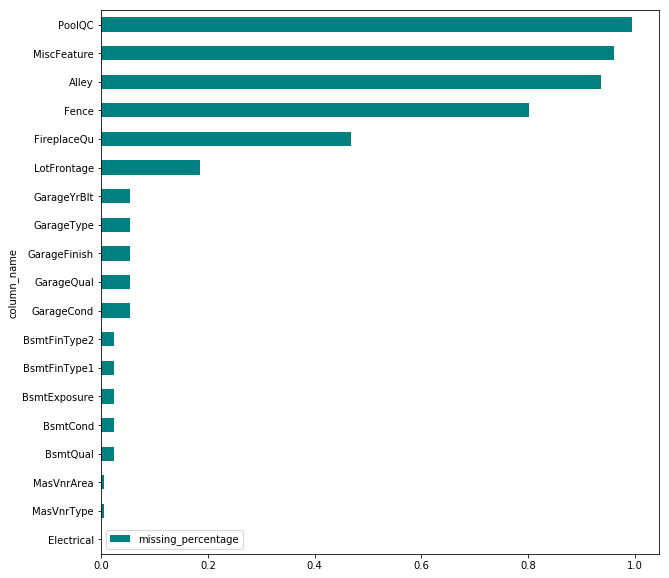

In [1272]:
missing_df.plot(x='column_name', y='missing_percentage', kind='barh', figsize=(10,10), logx=False ,color='teal')
#plt.show()

In [1273]:
num_feas = train.dtypes[train.dtypes != 'object'].index
cat_feas = train.dtypes[train.dtypes == 'object'].index

In [1274]:
num_feas

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [1275]:
len(num_feas)

36

In [1276]:
cat_feas

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [1277]:
len(cat_feas)

43

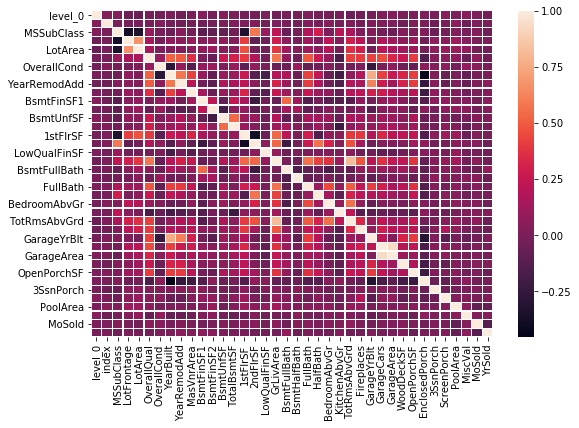

In [1887]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(corrmat, linewidths=.2)

In [1279]:
correlation = corrmat.abs()

In [1280]:
upper = correlation.where(np.triu(np.ones(correlation.shape),k=1).astype(np.bool))

In [1281]:
to_drop = [col for col in upper.columns if any(upper[col] > 0.9)]

In [1282]:
to_drop

[]

we do not have too many features and there are no features are too closely related. So I decide not to delete any numerical feature.

In [1339]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [1340]:
all_train = pd.concat([train, mytest], axis=0)
all_train.shape

(1460, 79)

In [1469]:
train_cat_sparse = pd.DataFrame(data = None)
test_cat_sparse = pd.DataFrame(data = None)
for cat_fea in cat_feas:
    le_cat = LabelEncoder().fit(all_train[cat_fea].astype(str))
    train_cat_sparse[cat_fea] = le_cat.transform(all_train[cat_fea].astype(str))
    test_cat_sparse[cat_fea] = le_cat.transform(test[cat_fea].astype(str))

In [1470]:
train_cat_sparse.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,3,1,1,3,3,0,4,0,12,2,...,1,2,5,5,2,3,4,1,8,4
1,3,1,1,0,3,0,4,0,8,2,...,1,2,5,5,2,3,4,1,8,4
2,3,1,1,3,3,0,4,0,7,1,...,6,1,3,3,1,3,2,1,8,4
3,3,1,1,3,3,0,0,0,18,1,...,5,3,5,5,2,3,2,1,8,4
4,3,1,2,3,3,0,4,0,18,2,...,5,3,5,5,2,3,4,1,8,4


In [1471]:
train_cat_sparse.shape

(1460, 43)

In [1472]:
ohe = OneHotEncoder(sparse=False).fit(train_cat_sparse)
alltrain_cat = ohe.transform(train_cat_sparse)
test_cat = ohe.transform(test_cat_sparse)

In [1473]:
alltrain_cat = pd.DataFrame(alltrain_cat)
test_cat = pd.DataFrame(test_cat)


In [1474]:
alltrain_cat.head()

,0,1,2,3,4,5,6,7,8,9,...,256,257,258,259,260,261,262,263,264,265
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [1475]:
sum_columns=0
for cat_fea in cat_feas:
    sum_columns += len(np.unique(train_cat_sparse[cat_fea]))

sum_columns

266

In [1476]:
alltrain_cat.shape

(1460, 266)

266 match each other.

In [1477]:
skewed_feas = train[num_feas].apply(lambda x: skew(x)).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feas})
skewness.head()

,Skew
PoolArea,13.845526
3SsnPorch,7.449055
LowQualFinSF,7.275022
MiscVal,4.865739
BsmtHalfBath,3.851735


In [1478]:
skewness = skewness[abs(skewness)>0.8]
print("number of skewed features: {}".format(skewness.shape[0]))

number of skewed features: 36


In [1479]:
from scipy.special import boxcox1p
skewed = skewness.index
lmbda = 0.15
for fea in skewed:
    train[fea] = boxcox1p(train[fea],lmbda)
    mytest[fea] = boxcox1p(mytest[fea],lmbda)
    test[fea] = boxcox1p(test[fea],lmbda)

In [1509]:
train_cat = alltrain_cat.loc[:1167,:]
train_cat = pd.DataFrame(train_cat)

In [1510]:
train_cat.shape

(1168, 266)

In [1511]:
mytest_cat = alltrain_cat.loc[1168:,:]
mytest_cat = pd.DataFrame(mytest_cat)
mytest_cat.shape

(292, 266)

In [1512]:
mytest[num_feas].shape

(292, 36)

In [1517]:
mytest_cat = mytest_cat.reset_index(drop=True)
mytest[num_feas] = mytest[num_feas].reset_index(drop=True)

pre_mytest = pd.concat([mytest_cat, mytest[num_feas]], axis=1)
pre_mytest.shape

(292, 302)

In [1518]:
train_cat = train_cat.reset_index(drop=True)
train = train.reset_index(drop=True)

pre_train = pd.concat([train_cat, train[num_feas]], axis=1)
pre_train.shape

(1168, 302)

In [1519]:
pre_test = pd.concat([test_cat, test[num_feas]], axis=1)
pre_test.shape

(1459, 302)

# Modeling

In [625]:
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn import metrics

## Select the best alpha with RidgeCV

In [1520]:
alphas = np.logspace(-2, 2, num=200)
ridgeregcv = RidgeCV(alphas=alphas, normalize=True, scoring='mean_squared_error')
ridgeregcv.fit(pre_train,y_train)
ridgeregcv.alpha_

0.2800503894183631

In [1879]:
y_pred = ridgeregcv.predict(pre_train)
print (np.sqrt(metrics.mean_squared_error(y_pred,y_train)))

0.10194072170962595


In [1522]:
y_pred = ridgeregcv.predict(pre_mytest)
print (np.sqrt(metrics.mean_squared_error(y_pred,y_mytest)))

0.13351073574037964


## Select the best alpha with LassoCV

In [1861]:
lassoregcv = LassoCV(n_alphas=100, normalize=True, random_state=1)
lassoregcv.fit(pre_train,y_train)
lassoregcv.alpha_

0.00016273728152413504

In [1880]:
y_pred = lassoregcv.predict(pre_train)
print (np.sqrt(metrics.mean_squared_error(y_pred,y_train)))

0.10600448380621814


In [1862]:
y_pred = lassoregcv.predict(pre_mytest)
print (np.sqrt(metrics.mean_squared_error(y_pred,y_mytest)))

0.12953192657419912


## Xgboost method

In [1525]:
from xgboost import XGBRegressor

In [1526]:
xgb_model = XGBRegressor()
xgb_model.fit(pre_train,y_train,verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [1527]:
predictions = xgb_model.predict(pre_mytest)

In [1528]:
print("mean squared error:"+ str(metrics.mean_squared_error(predictions,y_mytest)))

mean squared error:0.019851889989235188


### xgboost model tuning

In [1738]:
import xgboost as xgb

In [1739]:
y_mean = np.mean(y_train)

In [1742]:
xgb_params = {
    'eta': 0.037,
    'max_depth': 5,
    'subsample': 0.80,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'lambda': 0.8,   
    'alpha': 0.4, 
    'base_score': y_mean,
    'silent': 1
}

In [1743]:
dtrain = xgb.DMatrix(pre_train, y_train)
dtest = xgb.DMatrix(pre_mytest)

num_boost_rounds = 250
print("num_boost_rounds="+str(num_boost_rounds))

# train model
print( "\nTraining XGBoost ...")
model = xgb.train(dict(xgb_params, silent=1), dtrain, num_boost_round=num_boost_rounds)

print( "\nPredicting with XGBoost ...")
xgb_predmytest = model.predict(dtest)

print( "\nFirst XGBoost predictions:" )
print( pd.DataFrame(xgb_predmytest).head() )

num_boost_rounds=250

Training XGBoost ...

Predicting with XGBoost ...

First XGBoost predictions:
           0
0  11.840175
1  12.753184
2  11.658457
3  11.970504
4  12.662990


In [1744]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_mytest, xgb_predmytest))

0.13482845152449696

In [1790]:
import copy
default_xgb_params = {
    'eta': 0.037,
    'max_depth': 5,
    'subsample': 0.80,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    #'num_boost_rounds': 250,
    'lambda': 0.8,   
    'alpha': 0.4, 
    'base_score': y_mean,
    'silent': 1
}

params_xgb_space = {}
params_xgb_space['eta'] = [0.01, 0.03, 0.04, 0.05, 0.06, 0.07]
params_xgb_space['max_depth'] = [2, 3, 4, 5, 6, 7, 8]
params_xgb_space['subsample'] = [0.8, 0.85, 0.9, 0.95, 1]
params_xgb_space['min_child_weight'] = [0.01, 0.1, 0.5, 1, 5, 10]
params_xgb_space['lambda'] = [0.01, 0.02, 0.03, 0.04, 0.1]
params_xgb_space['alpha'] = [0.1, 0.2, 0.3, 0.4, 1]
params_xgb_space['objective'] = ['reg:linear', 'count:poisson', 'rank:pairwise']

best_xgb_params = copy.copy(default_xgb_params)

for p in params_xgb_space:
    print("\n Tuning parameter %s in %s" % (p, params_xgb_space[p]))
    params = best_xgb_params
    scores = []
    for v in params_xgb_space[p]:
        print("\n %s: %s" % (p, v), end="\n")
        params[p] = v
        xgb_cv = xgb.cv(params,
                       xgb.DMatrix(pre_train,
                                  label=y_train),
                       num_boost_round=10000,
                       nfold = kfolds,
                       stratified=False,
                       early_stopping_rounds=50,
                       verbose_eval=500)
        best_xgb_score = min(xgb_cv['test-rmse-mean'])
        best_xgb_iteration = len(xgb_cv['test-rmse-mean'])
        print ('best_score: %f of best iteration: %f ' % (best_xgb_score, best_xgb_iteration))
        scores.append([v, best_xgb_score])
    best_param_value = sorted(scores, key=lambda x:x[1], reverse = False)[0][0]
    best_param_score = sorted(scores, key=lambda x:x[1], reverse = False)[0][1]
    best_xgb_params[p] = best_param_value
    print ("Best %s is %s with a score of %f" %(p, best_param_value, best_param_score))

print ('\n Best manually tuned parameters:', best_xgb_params)    



 Tuning parameter eta in [0.01, 0.03, 0.04, 0.05, 0.06, 0.07]

 eta: 0.01
[0]	train-rmse:0.387342+0.006153	test-rmse:0.386811+0.0250714
[500]	train-rmse:0.069167+0.00200752	test-rmse:0.133783+0.0174268
[1000]	train-rmse:0.050242+0.00121542	test-rmse:0.128764+0.0177835
[1500]	train-rmse:0.0402838+0.000749708	test-rmse:0.12791+0.0178806
best_score: 0.127758 of best iteration: 1639.000000 

 eta: 0.03
[0]	train-rmse:0.381264+0.00606122	test-rmse:0.381222+0.0247945
[500]	train-rmse:0.0404948+0.000875486	test-rmse:0.128115+0.0170914
best_score: 0.127630 of best iteration: 789.000000 

 eta: 0.04
[0]	train-rmse:0.378235+0.00601529	test-rmse:0.378441+0.0246558
[500]	train-rmse:0.0345236+0.000526622	test-rmse:0.128035+0.0180198
[1000]	train-rmse:0.0244026+0.000198471	test-rmse:0.127668+0.0180963
best_score: 0.127648 of best iteration: 976.000000 

 eta: 0.05
[0]	train-rmse:0.375212+0.00596944	test-rmse:0.375669+0.024517
[500]	train-rmse:0.0307404+0.000331796	test-rmse:0.127449+0.0177778
best_

[500]	train-rmse:0.0730508+0.00228701	test-rmse:0.123817+0.0174337
[1000]	train-rmse:0.054682+0.0015228	test-rmse:0.121059+0.017578
best_score: 0.120458 of best iteration: 1290.000000 

 alpha: 0.2
[0]	train-rmse:0.378558+0.00596262	test-rmse:0.378001+0.0250043
[500]	train-rmse:0.0756376+0.00217155	test-rmse:0.123818+0.0186928
[1000]	train-rmse:0.058625+0.00142288	test-rmse:0.12067+0.0189758
best_score: 0.120041 of best iteration: 1276.000000 

 alpha: 0.3
[0]	train-rmse:0.378577+0.00596231	test-rmse:0.37802+0.0250045
[500]	train-rmse:0.078424+0.00229305	test-rmse:0.123036+0.019189
[1000]	train-rmse:0.0624044+0.00164403	test-rmse:0.119875+0.0195356
best_score: 0.119296 of best iteration: 1276.000000 

 alpha: 0.4
[0]	train-rmse:0.378595+0.00596211	test-rmse:0.378038+0.025005
[500]	train-rmse:0.0807966+0.00226657	test-rmse:0.123483+0.0189666
[1000]	train-rmse:0.0659732+0.00167652	test-rmse:0.120489+0.0189379
best_score: 0.119719 of best iteration: 1425.000000 

 alpha: 1
[0]	train-rmse:

In [1791]:

xgb_cv = xgb.cv(best_xgb_params,
            dtrain,
            num_boost_round=10000,
            nfold=kfolds,
            stratified=False,
            )


best_xgb_score = min(xgb_cv['test-rmse-mean'])
best_xgb_iteration = len(xgb_cv['test-rmse-mean'])
print (', best_score: %f, best_iteration: %d' % (best_xgb_score, best_xgb_iteration))
dtrain = xgb.DMatrix(pre_train, y_train)
dmytest = xgb.DMatrix(pre_mytest)

#num_boost_rounds = 250
#print("num_boost_rounds="+str(num_boost_rounds))

# train model
print( "\nTraining XGBoost ...")
model = xgb.train(dict(xgb_params, silent=1), dtrain, num_boost_round=best_xgb_iteration)

print( "\nPredicting with XGBoost ...")
xgb_predmytest = model.predict(dmytest)


, best_score: 0.118785, best_iteration: 10000

Training XGBoost ...

Predicting with XGBoost ...


In [1792]:
dtest = xgb.DMatrix(pre_test)

In [1793]:
xgb_predtest = model.predict(dtest)
xgb_prediction = np.exp(xgb_predtest) - 1

In [1794]:
sub = pd.DataFrame()
sub['id'] = test_id
sub['SalePrice'] = xgb_prediction
sub.to_csv('xgb_submission2.csv',index=False)


In [1850]:
dmytest = xgb.DMatrix(pre_mytest)
xgb_predmytest = model.predict(dmytest)

In [1851]:
np.sqrt(mean_squared_error(y_mytest, xgb_predmytest))

0.13569303194416268

In [1878]:
#dtrain = xgb.DMatrix(pre_train)
xgb_predtrain = model.predict(dtrain)
np.sqrt(mean_squared_error(y_train, xgb_predtrain))

0.013976364690339872

In [1745]:
xgb.cv?

## LightGBM Method

In [1763]:
import lightgbm as lgb
from sklearn.model_selection import KFold, StratifiedKFold
kfolds = 5
random_state = 42

In [1591]:
lgb_params = {'objective':'regression_l2',
              'learning_rate':0.02,
              'metric':'rmse','bagging_freq':1,
              'seed':1234,'num_leaves':30,'verbose':1,
              'max_depth':30,'min_gain_to_split':0.5,
              'feature_fraction':0.5,'bagging_fraction':1,
              'min_sum_hessian_in_leaf':1,
              'lambda_l2':0,'lambda_l1':0
    
}

lgb_cv = lgb.cv(lgb_params,
               lgb.Dataset(pre_train,
                          label = y_train),
               num_boost_round=10000,
               nfold=kfolds,
               stratified=False,
               early_stopping_rounds=50,
               verbose_eval=500
               )
best_lgb_score = min(lgb_cv['rmse-mean'])
best_lgb_iteration = len(lgb_cv['rmse-mean'])
print('Best LightGBM score : %f, best iteration: %d' %(best_lgb_score, best_lgb_iteration))

Best LightGBM score : 0.150939, best iteration: 186


In [1588]:
model = lgb.train(lgb_params,
                lgb.Dataset(pre_train,
                            label=y_train
                            ),
                num_boost_round=best_lgb_iteration)

### LightGBM Parameter tuning

In [1839]:
import copy
default_lgb_params = {}
default_lgb_params['learning_rate'] = 0.02
default_lgb_params["metric"] = 'rmse'
default_lgb_params["bagging_freq"] = 1
#default_lgb_params["seed"] = 9
default_lgb_params["objective"] = "regression_l2"
default_lgb_params["num_threads"] = 2
default_lgb_params["feature_fraction_seed"] =9, 
default_lgb_params["bagging_seed"] =9

params_lgb_space = {}
params_lgb_space['learning_rate'] =[0.027, 0.03, 0.033, 0.04]
params_lgb_space['n_estimators'] = [10, 100, 450, 500, 550, 900]
params_lgb_space['max_bin'] = [10, 15, 20, 25, 30, 50, 100, 1000]
params_lgb_space['max_depth'] = [2, 3, 4, 5, 10, -1]
params_lgb_space['num_leaves'] = [3, 5, 7, 8, 10, 12]
params_lgb_space['bagging_fraction'] = [0.7, 0.73, 0.75, 0.78, 0.8, 0.9]
params_lgb_space["bagging_freq"] = [1,  3, 4, 5, 7, 10]
params_lgb_space['min_gain_to_split'] = [0, 0.0005, 0.001, 0.005, 0.01]
params_lgb_space['feature_fraction'] = [0.1, 0.2, 0.3, 0.4, 0.5, 0.8]
params_lgb_space['min_data_in_leaf'] = [10, 12, 15, 18, 20, 25]
params_lgb_space['min_sum_hessian_in_leaf'] = [0.0001, 0.0005, 0.001, 0.01, 0.1]
params_lgb_space['lambda_l2'] = [0, 0.001, 0.01, 0.1, 0.5, 1]
params_lgb_space['lambda_l1'] = [0, 0.001, 0.005, 0.01, 0.1, 0.5, 1]
params_lgb_space['objective'] = ['regression', 'regression_l2', 'regression_l1', 'poisson']

best_lgb_params = copy.copy(default_lgb_params)

for p in params_lgb_space:
    print("\n Tuning parameter %s in %s" % (p, params_lgb_space[p]))
    params = best_lgb_params
    scores = []
    for v in params_lgb_space[p]:
        print("\n %s: %s" % (p, v), end="\n")
        params[p] = v
        lgb_cv = lgb.cv(params,
                       lgb.Dataset(pre_train,
                                  label=y_train),
                       num_boost_round=10000,
                       nfold = kfolds,
                       stratified=False,
                       early_stopping_rounds=50,
                       verbose_eval=500)
        best_lgb_score = min(lgb_cv['rmse-mean'])
        best_lgb_iteration = len(lgb_cv['rmse-mean'])
        print (', best_score: %f, best_iteration: %d' % (best_lgb_score, best_lgb_iteration))
        scores.append([v, best_lgb_score])
    best_param_value = sorted(scores, key=lambda x:x[1], reverse = False)[0][0]
    best_param_score = sorted(scores, key=lambda x:x[1], reverse = False)[0][1]
    best_lgb_params[p] = best_param_value
    print ("Best %s is %s with a score of %f" %(p, best_param_value, best_param_score))

print ('\n Best manually tuned parameters:', best_lgb_params)    



 Tuning parameter learning_rate in [0.027, 0.03, 0.033, 0.04]

 learning_rate: 0.027
[500]	cv_agg's rmse: 0.13242 + 0.0167226
, best_score: 0.132376, best_iteration: 494

 learning_rate: 0.03
[500]	cv_agg's rmse: 0.132039 + 0.0172441
, best_score: 0.132006, best_iteration: 493

 learning_rate: 0.033
, best_score: 0.132149, best_iteration: 254

 learning_rate: 0.04
, best_score: 0.132100, best_iteration: 348
Best learning_rate is 0.03 with a score of 0.132006

 Tuning parameter n_estimators in [10, 100, 450, 500, 550, 900]

 n_estimators: 10
, best_score: 0.313044, best_iteration: 10

 n_estimators: 100
, best_score: 0.141970, best_iteration: 100

 n_estimators: 450
, best_score: 0.132066, best_iteration: 449

 n_estimators: 500
[500]	cv_agg's rmse: 0.132039 + 0.0172441
, best_score: 0.132006, best_iteration: 493

 n_estimators: 550
[500]	cv_agg's rmse: 0.132039 + 0.0172441
, best_score: 0.132006, best_iteration: 493

 n_estimators: 900
[500]	cv_agg's rmse: 0.132039 + 0.0172441
, best_

[500]	cv_agg's rmse: 0.122468 + 0.0183776
, best_score: 0.122468, best_iteration: 500

 lambda_l2: 0.5
[500]	cv_agg's rmse: 0.122566 + 0.0183568
, best_score: 0.122566, best_iteration: 500

 lambda_l2: 1
[500]	cv_agg's rmse: 0.122737 + 0.0185995
, best_score: 0.122732, best_iteration: 497
Best lambda_l2 is 0.001 with a score of 0.122383

 Tuning parameter lambda_l1 in [0, 0.001, 0.005, 0.01, 0.1, 0.5, 1]

 lambda_l1: 0
[500]	cv_agg's rmse: 0.122384 + 0.0183737
, best_score: 0.122383, best_iteration: 498

 lambda_l1: 0.001
[500]	cv_agg's rmse: 0.122171 + 0.0184075
, best_score: 0.122171, best_iteration: 500

 lambda_l1: 0.005
[500]	cv_agg's rmse: 0.122277 + 0.0183106
, best_score: 0.122277, best_iteration: 500

 lambda_l1: 0.01
[500]	cv_agg's rmse: 0.122122 + 0.0185334
, best_score: 0.122122, best_iteration: 500

 lambda_l1: 0.1
[500]	cv_agg's rmse: 0.122686 + 0.0185991
, best_score: 0.122671, best_iteration: 497

 lambda_l1: 0.5
[500]	cv_agg's rmse: 0.124879 + 0.0192797
, best_score: 0

In [ ]:
0.120697

In [1852]:
print (best_lgb_params)


lgb_cv = lgb.cv(best_lgb_params,
            lgb.Dataset(pre_train,
                        label=y_train
                        ),
            num_boost_round=10000,
            nfold=kfolds,
            stratified=False,
            early_stopping_rounds=50,
            verbose_eval=500)

best_lgb_score = min(lgb_cv['rmse-mean'])
best_lgb_iteration = len(lgb_cv['rmse-mean'])
print (', best_score: %f, best_iteration: %d' % (best_lgb_score, best_lgb_iteration))

{'learning_rate': 0.03, 'metric': 'rmse', 'bagging_freq': 1, 'objective': 'regression', 'num_threads': 2, 'feature_fraction_seed': (9,), 'bagging_seed': 9, 'n_estimators': 500, 'max_bin': 20, 'max_depth': 3, 'num_leaves': 8, 'bagging_fraction': 0.78, 'min_gain_to_split': 0.01, 'feature_fraction': 0.2, 'min_data_in_leaf': 15, 'min_sum_hessian_in_leaf': 0.0001, 'lambda_l2': 0.001, 'lambda_l1': 0.01}
[500]	cv_agg's rmse: 0.122122 + 0.0185334
, best_score: 0.122122, best_iteration: 500


In [1853]:
train_data = lgb.Dataset(pre_train, label=y_train)
mytest_data = lgb.Dataset(pre_mytest, label=y_mytest)

In [1854]:
bst = lgb.train(best_lgb_params, train_data, num_boost_round=best_lgb_iteration)

In [1855]:
mytest_data = lgb.Dataset(pre_mytest)
test_data = lgb.Dataset(pre_test)

In [1856]:
trainpred = bst.predict(pre_train, num_boost_round=best_lgb_iteration)

In [1857]:
mytestpred = bst.predict(pre_mytest, num_boost_round=best_lgb_iteration)

In [1858]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_mytest, mytestpred))

0.13431626681129732

In [1877]:

print("mean squared error:"+ str(np.sqrt(metrics.mean_squared_error(trainpred ,y_train))))

mean squared error:0.09237440883435132


In [1847]:
testpred = bst.predict(pre_test, num_boost_round=best_lgb_iteration)

In [1848]:
lgb_prediction = np.exp(testpred) - 1

In [1849]:
sub = pd.DataFrame()
sub['id'] = test_id
sub['SalePrice'] = lgb_prediction
sub.to_csv('lgb_submission6.csv',index=False)

# 1: 0.13005
# 2: 0.12796
# 3: 0.12670
# 4: 0.12663
#

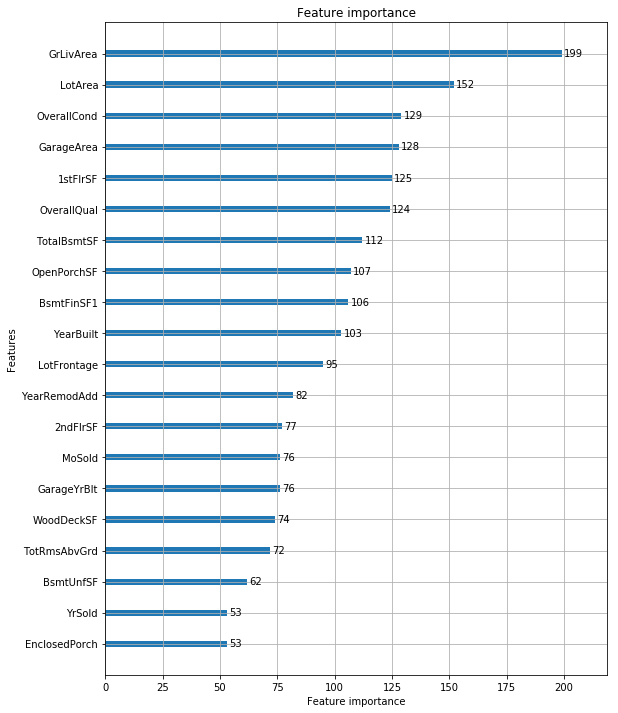

In [1811]:
lgb.plot_importance(bst, figsize=(9,12), max_num_features=20)

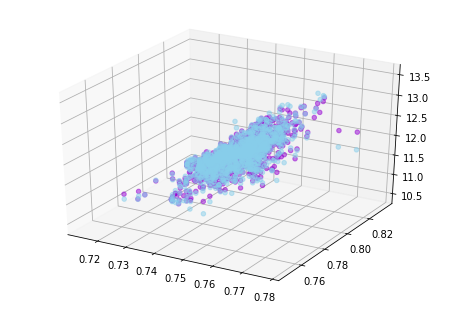

In [1812]:
import pylab as plt 
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(plt.gcf()) 
ax.scatter(xs=pre_train['GrLivArea'], ys=pre_train['LotArea'], zs=y_train, c='skyblue', alpha=0.5)
ax.scatter(xs=pre_train['GrLivArea'], ys=pre_train['LotArea'], zs=trainpred, c='darkviolet', alpha=0.5)
plt.show()

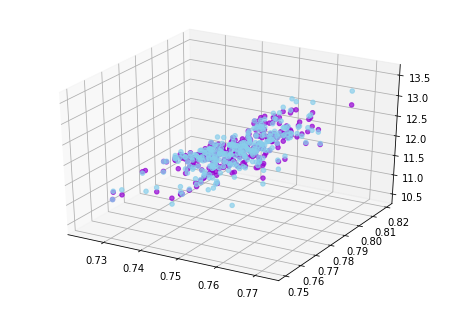

In [1813]:
fig = plt.figure()
ax = Axes3D(plt.gcf()) 
ax.scatter(xs=pre_mytest['GrLivArea'], ys=pre_mytest['LotArea'], zs=y_mytest, c='skyblue', alpha=0.7)
ax.scatter(xs=pre_mytest['GrLivArea'], ys=pre_mytest['LotArea'], zs=mytestpred, c='darkviolet', alpha=0.7)
plt.show()

In [1633]:
import plotly.plotly as py
import plotly.graph_objs as go

In [1634]:
plot_train = pd.DataFrame()
plot_train['GrLivArea'] = pre_train['GrLivArea']
plot_train['1stFlrSF'] = pre_train['1stFlrSF']
plot_train['logprice'] = y_train


plot_tpred = pd.DataFrame()
plot_tpred['GrLivArea'] = pre_train['GrLivArea']
plot_tpred['1stFlrSF'] = pre_train['1stFlrSF']
plot_tpred['logprice'] = trainpred



In [1725]:
plot = pd.DataFrame()
plot['GrLivArea'] = pre_train['GrLivArea']
plot['1stFlrSF'] = pre_train['1stFlrSF']
plot['logprice'] = y_train
plot.to_csv('plot.csv',index=False)


In [1726]:
plot2 = pd.DataFrame()
plot2['GrLivArea'] = pre_train['GrLivArea']
plot2['1stFlrSF'] = pre_train['1stFlrSF']
plot2['logprice'] = trainpred
plot2.to_csv('plot2.csv',index=False)


In [1727]:
plot = pd.DataFrame()
plot['GrLivArea'] = pre_mytest['GrLivArea']
plot['1stFlrSF'] = pre_mytest['1stFlrSF']
plot['logprice'] = y_mytest
plot.to_csv('plot3.csv',index=False)

plot2 = pd.DataFrame()
plot2['GrLivArea'] = pre_mytest['GrLivArea']
plot2['1stFlrSF'] = pre_mytest['1stFlrSF']
plot2['logprice'] = mytestpred
plot2.to_csv('plot4.csv',index=False)


## Random Forest method

In [1863]:
from sklearn.ensemble import RandomForestRegressor

In [1874]:
regr = RandomForestRegressor(max_depth=3, random_state=0,
                             n_estimators=100)
regr.fit(pre_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [1876]:
predicted = regr.predict(pre_train)
print("mean squared error:"+ str(np.sqrt(metrics.mean_squared_error(predicted,y_train))))

mean squared error:0.1828410773152385


In [1875]:
predicted = regr.predict(pre_mytest)
print("mean squared error:"+ str(np.sqrt(metrics.mean_squared_error(predicted,y_mytest))))

mean squared error:0.20486903036063864


# Ensemble


In [1815]:
ensemble = xgb_prediction*0.1 + lgb_prediction*0.9
sub = pd.DataFrame()
sub['id'] = test_id
sub['SalePrice'] = ensemble
sub.to_csv('ensemble_submission4.csv',index=False)

## references

### https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard

### https://www.kaggle.com/apapiu/regularized-linear-models